In [1]:
import numpy as np
import io
import sys
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_path = 'Examples/australia/uplight_modelsrun/realtime_data/'
o_path = 'Examples/australia/old_model/realtime_data/'

In [3]:
new_elev = pickle.load(open("%s/0/pred_elev_vec.pkl"%(n_path), "rb" ) )
new_erdp = pickle.load(open("%s/0/pred_erodep_vec.pkl"%(n_path), "rb" ) )

In [4]:
old_elev = pickle.load(open("%s/0/pred_elev_vec.pkl"%(o_path), "rb" ) )
old_erdp = pickle.load(open("%s/0/pred_erodep_vec.pkl"%(o_path), "rb" ) )

In [9]:
# print(new_elev.keys())
# print(new_elev[0.0])
# print(new_elev[0.0].shape)

# print(new_erdp.keys())
# print(new_erdp[0.0])
# print(new_erdp[0.0].shape)

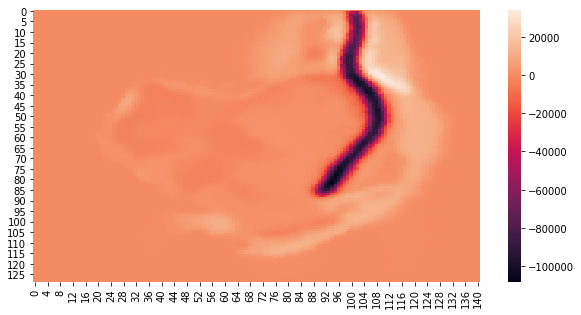

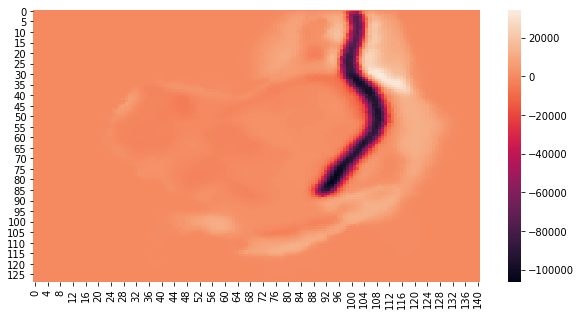

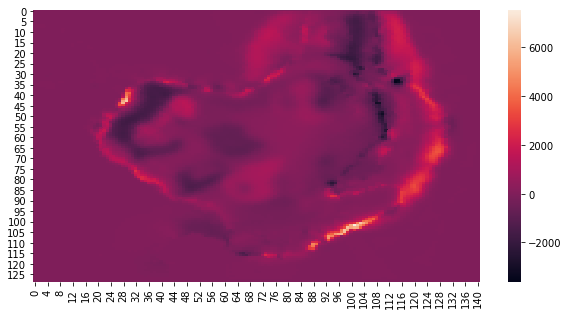

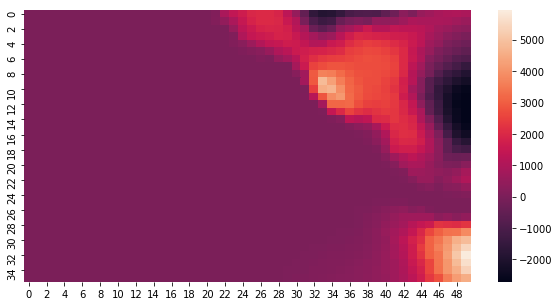

In [21]:

plt.figure(figsize=(10,5))
sns.heatmap(old_erdp[0.0])

plt.figure(figsize=(10,5))
sns.heatmap(new_erdp[0.0])

residual = old_erdp[0.0] - new_erdp[0.0]

plt.figure(figsize=(10,5))
sns.heatmap(residual)

basin = old_erdp[0.0]
basin = basin[68:104,0:50]
plt.figure(figsize=(10,5))
sns.heatmap(basin)

In [13]:

plt.figure(figsize=(10,5))
sns.heatmap(old_elev[0.0])


plt.figure(figsize=(10,5))
sns.heatmap(new_elev[0.0])

residual_elev = old_elev[0.0] - new_elev[0.0]
plt.figure(figsize=(10,5))
sns.heatmap(residual_elev)

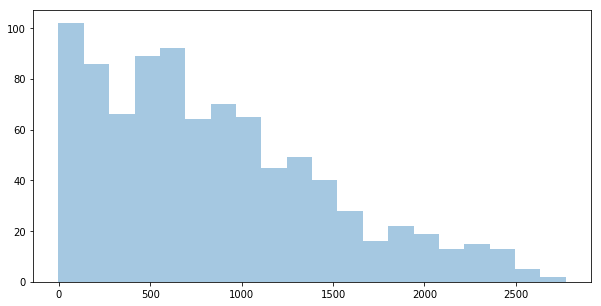

In [18]:
erdp_pts = np.loadtxt('Examples/australia/data/final_erdp_pts_.txt')
plt.figure(figsize=(10,5))
sns.distplot(erdp_pts, bins=20,kde = False)

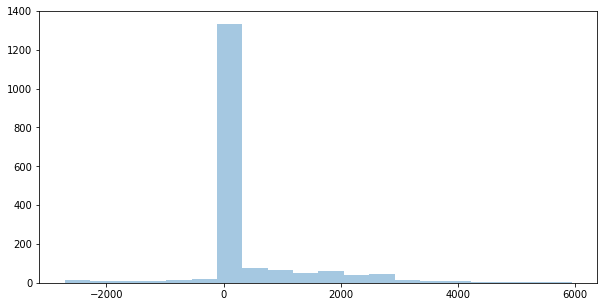

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(basin, bins=20,kde = False)